<table>
  <tr>
      <td><div align="left"><font size="20" >Tutorial B.1 - Basic Geometry</font></div></td>
     <td><img src="../../shared/common/RVSS-logo.png" width="400"></td>
  </tr>
</table>

## Table of Content

1. #### Rotation Matrices
2. #### Epipolar Lines
3. #### Fundamental Matrix


## 1. Rotation Matrices

In this section you will create a rotational matrix, apply the rotational matrix to a set of points, then plot the rotated set of points to see the effects.


We will begin by importing all the libraries we need and setting up the Jupyter notebook environment. Execute the following block of code.

In [1]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import math
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Next, using the code below, we will create a list of points in 3D space and plot the points.

<IPython.core.display.Javascript object>


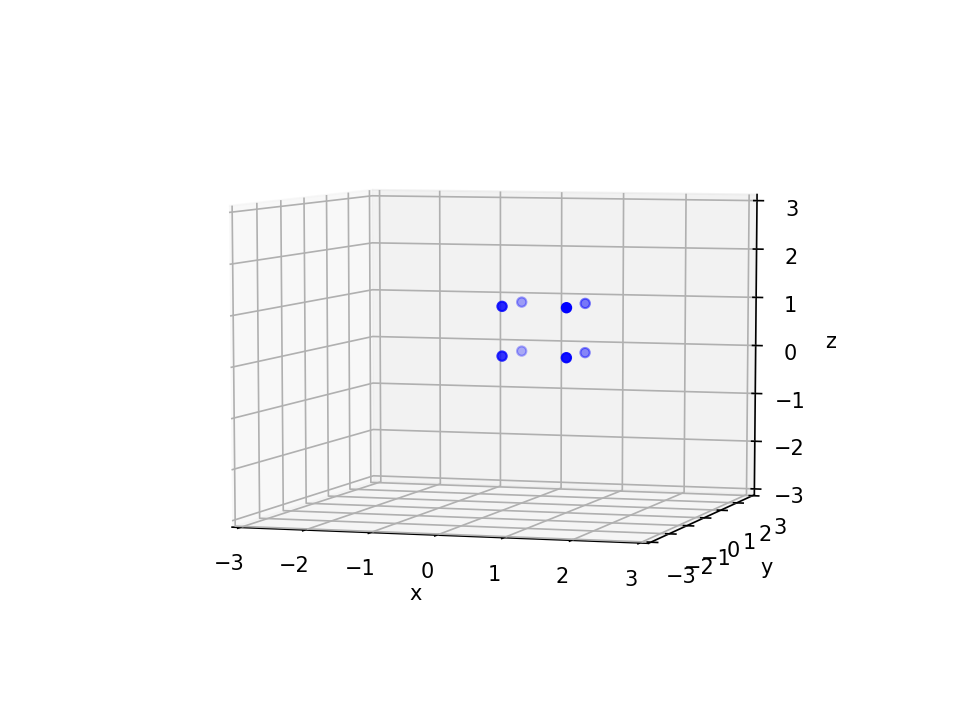

List of points (each column represents a point in 3D space)
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]


In [2]:
# create a 3D plot figure
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# create our points in 3D space
pt = np.array([[ 0, 0, 0 ],
               [ 1, 0, 0 ],
               [ 0, 1, 0 ],
               [ 0, 0, 1 ],
               [ 1, 1, 0 ],
               [ 0, 1, 1 ],
               [ 1, 0, 1 ],
               [ 1, 1, 1 ],
               ])
pt = pt.transpose() # transpose the matrix so that the points are in columns, in preparation for matrix operations later on.

# print out the points
print('List of points (each column represents a point in 3D space)')
print(pt)


# plot the points
ax.scatter(pt[0,:],pt[1,:],pt[2,:],'x', color='blue')


Drag around the 3D plot area with the mouse to rotate the plot around and see the cube from different angles.

Now, let's create a rotational matrix

In [3]:
## TODO: 
# create a rotational matrix that rotates a point by 45 deg about the x axis
# HINT: the math.cos() and math.sin() functions take angles in radians. Use math.radians() to convert from deg to rad

# Store your rotational matrix in this variable
Rotx = np.array([[1,0,0],[0,1,0],[0,0,1]]) # identity matrix


## End TODO ##

# print out the rotation matrix
print(Rotx)



[[1 0 0]
 [0 1 0]
 [0 0 1]]


Does the rotation matrix look like what you expected?

Now let's apply the rotation to our list of points by multiplying the rotation matrix with our list of points

Calculating Rotx . pt

Rotx =
[[1 0 0]
 [0 1 0]
 [0 0 1]]

pt =
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]

Answer =
[[0 1 0 0 1 0 1 1]
 [0 0 1 0 1 1 0 1]
 [0 0 0 1 0 1 1 1]]


<IPython.core.display.Javascript object>


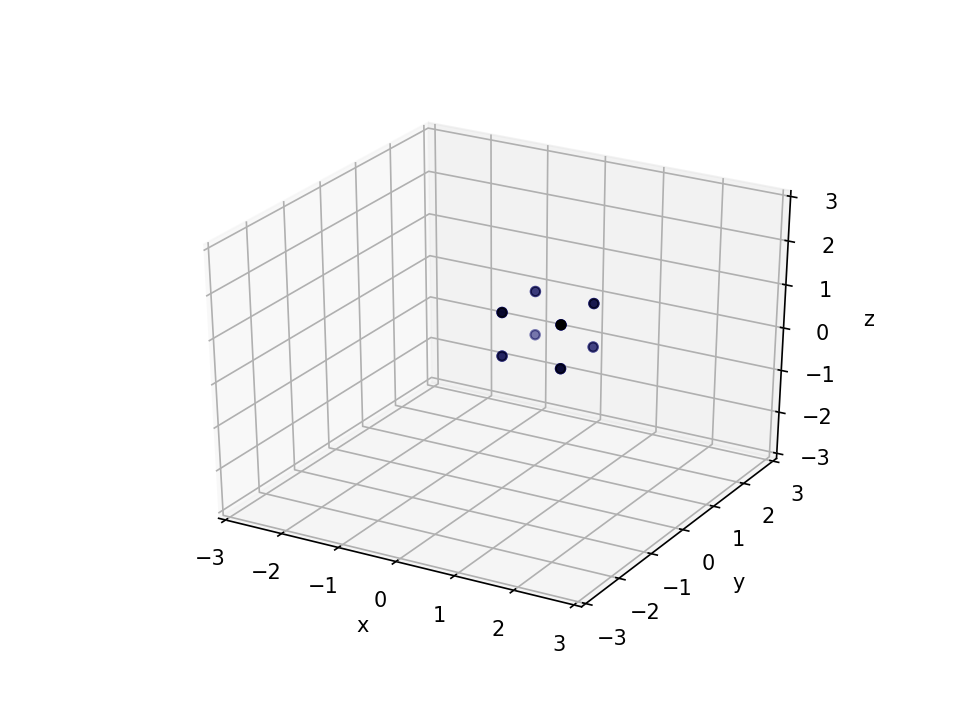

In [4]:
## TODO:
# Multiply the rotation matrix by the list of points to apply the rotation to the points
# HINT: Matrix multiplication between A and B can be computed as A.dot(B)

# Store your rotated list of points in this variable
pt_new = pt


## End TODO ##

# print out the matrix multiplication 
print("Calculating Rotx . pt\n")
print("Rotx =")
print(Rotx)
print("\npt =")
print(pt)
print("\nAnswer =")
print (pt_new.round(3))

# create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim(-3,3),ax.set_ylim(-3,3),ax.set_zlim(-3,3)
ax.set_xlabel('x'),ax.set_ylabel('y'),ax.set_zlabel('z')

# plot the original points in blue, and rotated points in black
ax.scatter(pt[0,:],pt[1,:],pt[2,:],'x', color='blue')
ax.scatter(pt_new[0,:],pt_new[1,:],pt_new[2,:],'x', color='black')

You should see that the new set of points are rotated about the x-axis by 45 deg

EXTRA: 

If you have time:

1) Try rotating the cube by different angles.

2) Try rotating the cube about different axes.

3) Try adding translation to shift the cube around (You can do this using either inhomogeneous or homogeneous coordinates).

### ============================= End of Rotation Matrices =============================

## 2. Epiploar Lines

In this section you will be given a pair of stereo images and the fundamental matrix relating the two images. 
Your task is then to calculate the corresponding epipolar lines given an image point. 

Let's begin by importing the libraries we need.

In [5]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import math
import cv2
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

Then, let's load a pair of stereo images.

<IPython.core.display.Javascript object>


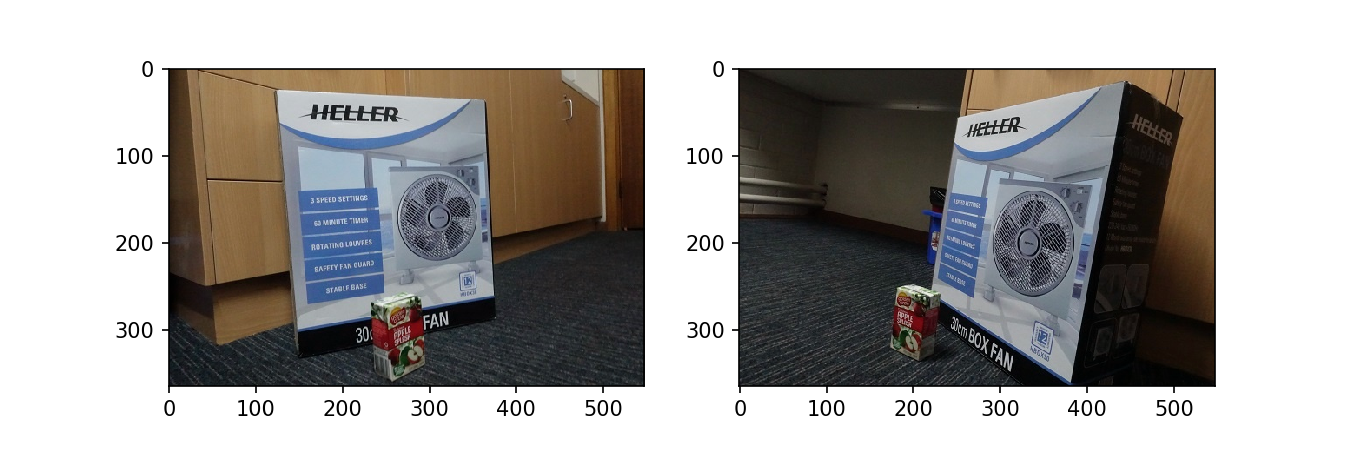

In [6]:
# load images
imgL = cv2.imread('image/imageL.jpg',1) # left image
imgR = cv2.imread('image/imageR.jpg',1) # right image

# show the images
fig=plt.figure(figsize=(9,3))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

plt.subplot(121),plt.imshow(imgL)
plt.subplot(122),plt.imshow(imgR)
plt.show()

When the calibration parameters are known, we can compute the fundamental matrix F.

Assume that we do know the calibration parameters and that the F is given as follows.

In [7]:
F = np.array([[ 1.90949913e-06,  9.75790606e-06, -1.18598730e-03],
              [ 1.43160751e-05,  1.72206173e-06,  1.64921212e-03],
              [-2.40914286e-03, -8.94764754e-03,  1.00000000e+00]])
print(F)

[[ 1.90949913e-06  9.75790606e-06 -1.18598730e-03]
 [ 1.43160751e-05  1.72206173e-06  1.64921212e-03]
 [-2.40914286e-03 -8.94764754e-03  1.00000000e+00]]


Here is a helper function to draw lines on the image (remember to run this cell too!)

In [8]:
# Draws the lines lines1 onto img1 
# and the points pts2 onto img2
def drawlines(img1,img2,lines1,pts2):
    r,c,v = img1.shape
    img1_out=img1.copy()
    img2_out=img2.copy()
    for line1,pt2 in zip(lines1.transpose(),pts2.transpose()):
        color = tuple(np.random.randint(0,255,3).tolist())
        x0,y0 = map(int, [0, -line1[2]/line1[1] ])
        x1,y1 = map(int, [c, -(line1[2]+line1[0]*c)/line1[1]])
        img1_out = cv2.line(img1_out, (x0,y0), (x1,y1), color,2)
        img2_out = cv2.circle(img2_out,tuple(pt2[0:2]),10,color,-1)
    return img1_out,img2_out

Complete the implementation of the functions below that compute and draw the epiploar lines in the left/right image, given a point in the right/left image

In [17]:
# Find epipolar lines corresponding to points in right image and
# draw the lines on left image
def draw_epipolar_left(ptsR,F,imgL,imgR):
    
    ## TODO: 
    # compute the corresponding epipolar line in the left image,
    # given a point ptsR in the right image  
    linesL = np.array([[1,1,1]]).transpose()
    
    
    ## End TODO ##

    # call our helper function to draw the point and corresponding epipolar line on the images
    imgL_out,imgR_out = drawlines(imgL,imgR,linesL,ptsR)
   
    # plot the images 
    plt.subplot(121),plt.imshow(imgL_out)
    plt.subplot(122),plt.imshow(imgR_out)

# Find epipolar lines corresponding to points in left image (first image) and
# drawing its lines on right image
def draw_epipolar_right(ptsL,F,imgL,imgR):
    
    ## TODO: 
    # compute the corresponding epipolar line in the right image,
    # given a point ptsL in the left image  
    linesR = np.array([[1,1,1]]).transpose()

    
    ## End TODO ##
    
    # call our helper function to draw the point and corresponding epipolar line on the images
    imgR_out,imgL_out = drawlines(imgR,imgL,linesR,ptsL)

    # plot the images 
    plt.subplot(121),plt.imshow(imgL_out)
    plt.subplot(122),plt.imshow(imgR_out)
    

Now that we have implemented the functions, let test them

<IPython.core.display.Javascript object>


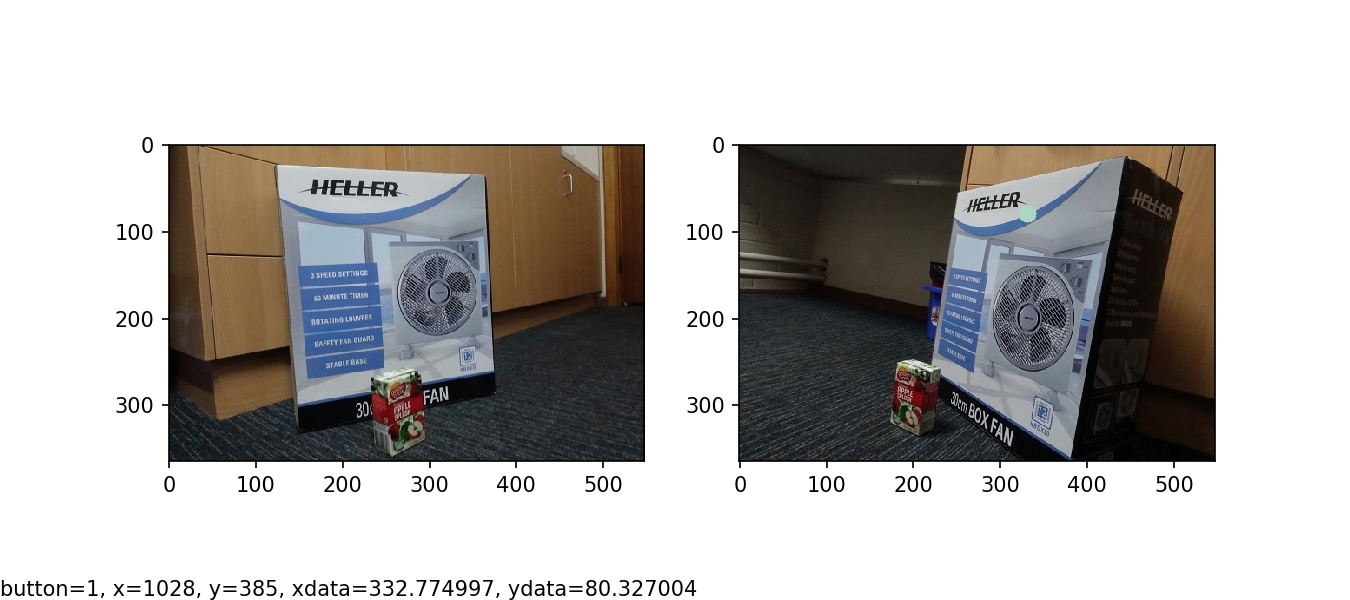

In [19]:
# create the figure element
fig=plt.figure(figsize=(9,4))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

    
# create test points 
ptsL = np.array([[164,54,1],
                 [235,137,1],
                 [292,303,1]])
ptsL =ptsL.transpose()

ptsR = np.array([[299,128,1],
                 [360,233,1],
                 [182,278,1]])
ptsR =ptsR.transpose()


# test the implemented function for drawing epipolar lines
draw_epipolar_right(ptsL,F,imgL,imgR)
#draw_epipolar_left(ptsR,F,imgL,imgR)
    

# show the plot
plt.show()

Check that the epipolar lines drawn on the left image for each the points in the right image do pass through the corresponding points in the left image.

To test more points in the images, execute the following interactive code. It will allow you to select a point by clicking on the left/right image above. The corresponding epipolar line will then be drawn on the other image using the functions you have just implemented above.


Check that the corresponding epipolar lines pass through the corresponding points on the other image.

Notice how all epipolar lines in one image appear to converge to one point (this point may be out of the image). This point is the epipole.



In [20]:
text=fig.text(0,0, "", va="bottom", ha="left")


def onclick(event):
    tx = 'button=%d, x=%d, y=%d, xdata=%f, ydata=%f' % (event.button, event.x, event.y, event.xdata, event.ydata)
    text.set_text(tx)
    x=int(event.xdata)
    y=int(event.ydata)
    if event.x > 641:
        ptsR = np.array([[x,y,1]])
        draw_epipolar_left(ptsR.transpose(),F,imgL,imgR)
    else:
        ptsL = np.array([[x,y,1]])
        draw_epipolar_right(ptsL.transpose(),F,imgL,imgR)

cid = fig.canvas.mpl_connect('button_press_event', onclick)

### ============================= End of Epipolar Lines=============================

## 3. Fundamental Matrix

In this section you will attempt to compute the Fundamental Matrix of a pair of given stereo images using the normalized 8-point algorithm and RANSAC.

Let's begin by importing the libraries we need, defining some drawing helper functions, and loading the images again (in case you didn't start from section 1).

<IPython.core.display.Javascript object>


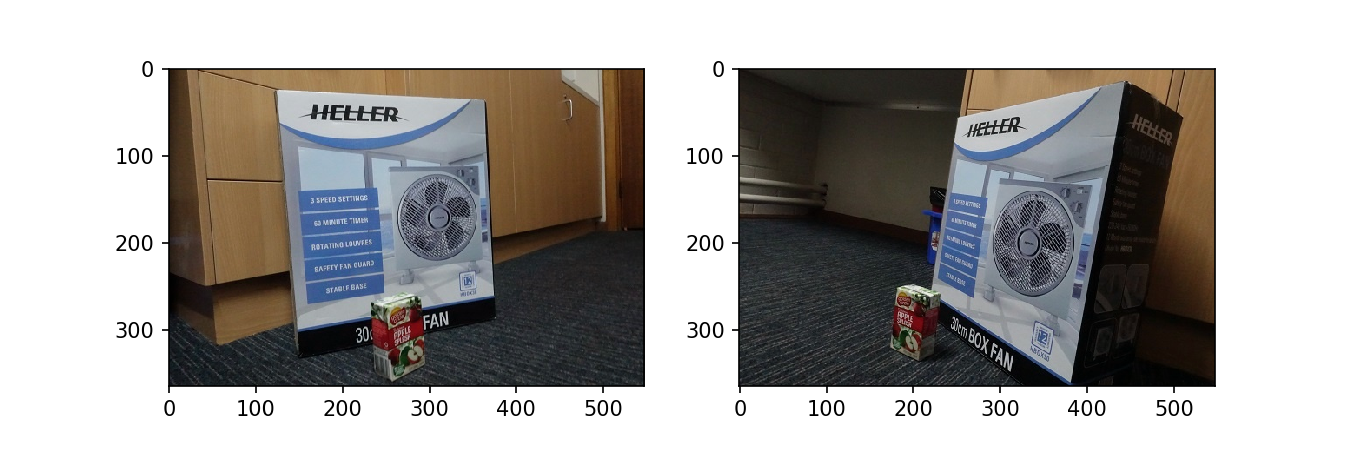

In [23]:
# this line tells Jupyter that we are rendering plots in "notebook" style
%matplotlib notebook

# import libraries we need
import math
import cv2
import numpy as np
from pylab import *
import matplotlib
from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load our images
imgR = cv2.imread('image/imageR.jpg',1) # right image
imgL = cv2.imread('image/imageL.jpg',1) # left image

# plot the images
fig=plt.figure(figsize=(9,3))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10) 

plt.subplot(121),plt.imshow(imgL)
plt.subplot(122),plt.imshow(imgR)
plt.show()

# draw the points pts1 on img1, 
# and draw the points pts2 on img2
def drawpts(img1,img2,pts1,pts2): 
    r,c,v = img1.shape                                
    img1_out=img1.copy()
    img2_out=img2.copy()
    for pt1,pt2 in zip(pts1.transpose(),pts2.transpose()):
        color = tuple(np.random.randint(0,255,3).tolist())                                                                                                                                                  
        img1_out = cv2.circle(img1_out,tuple(pt1[0:2]),10,color,-1)                                                                                                                                                       
        img2_out = cv2.circle(img2_out,tuple(pt2[0:2]),10,color,-1)    
    return img1_out,img2_out  

# draw the points pts1 on img1, 
# and draw the corresponding points pts2 and epipolar lines lines2 on img2
def drawptsNlines(img1,img2,pts1,pts2,lines2):                                                                                                                                                           
    r,c,v = img1.shape                                
    img1_out=img1.copy()
    img2_out=img2.copy()
    for pt1,pt2,line2 in zip(pts1.transpose(),pts2.transpose(),lines2.transpose()):
        color = tuple(np.random.randint(0,255,3).tolist())
        img1_out = cv2.circle(img1_out,tuple(pt1[0:2]),10,color,-1)                                                                                                                                                       
        img2_out = cv2.circle(img2_out,tuple(pt2[0:2]),10,color,-1)  
        
        x0,y0 = map(int, [0, -line2[2]/line2[1] ])                                                                                                                                                                  
        x1,y1 = map(int, [c, -(line2[2]+line2[0]*c)/line2[1] ])                                                                                                                                                         
        img2_out = cv2.line(img2_out, (x0,y0), (x1,y1), color,1)
    return img1_out,img2_out  

Next we will compute a set of corresponding feature points in the two images.

<IPython.core.display.Javascript object>


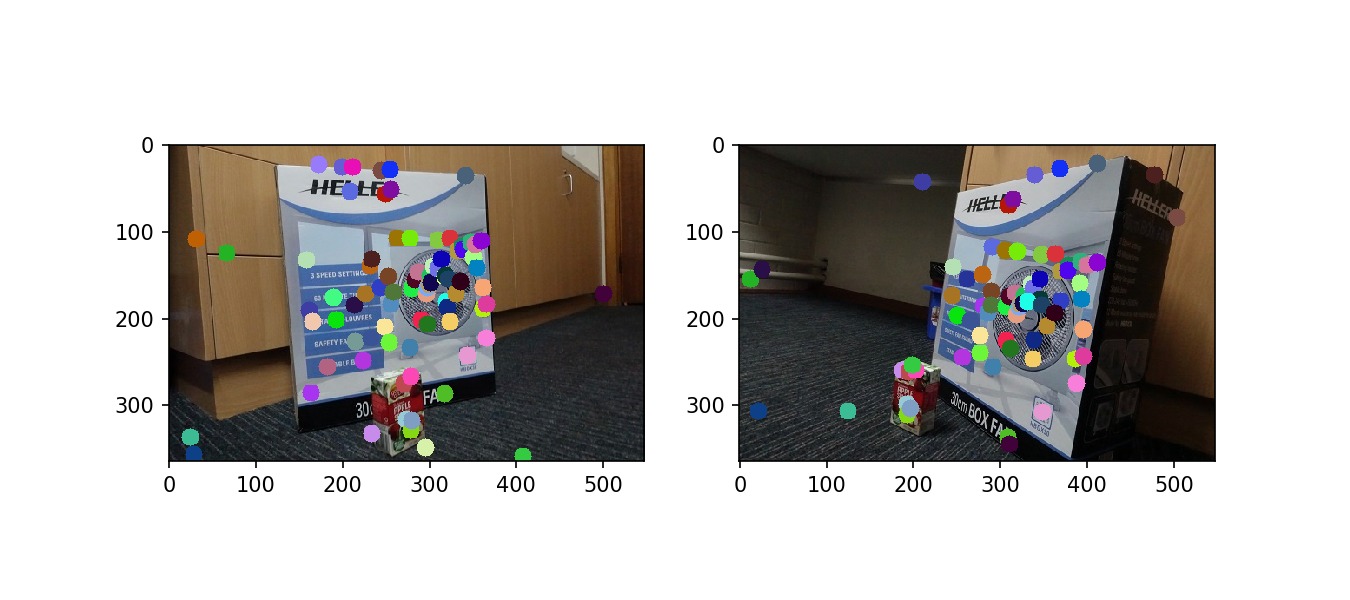

number of good corresponding features points detected: 85


In [25]:
# create the figure element
fig=plt.figure(figsize=(9,4))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

# create the sift interface
sift = cv2.xfeatures2d.SIFT_create()    

# find the keypoints and descriptors with SIFT
keypointsL, descriptorsL = sift.detectAndCompute(imgL,None)
keypointsR, descriptorsR = sift.detectAndCompute(imgR,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)

flann = cv2.FlannBasedMatcher(index_params,search_params)
matches = flann.knnMatch(descriptorsL,descriptorsR,k=2)

good = []
ptsL = []
ptsR = []
# ratio test as per Lowe's paper
for i,(m,n) in enumerate(matches):
    if m.distance < 0.8*n.distance:
        good.append(m)
        ptsR.append(keypointsR[m.trainIdx].pt)
        ptsL.append(keypointsL[m.queryIdx].pt)
    
ptsL = np.int32(ptsL)
ptsR = np.int32(ptsR)

ptsL=ptsL.transpose()
ptsR=ptsR.transpose()

# convert from inhomogeneous coordinates to honobeneous coordinates
ptsL = np.append(ptsL,np.ones([1,ptsL.shape[1]],int),0)
ptsR = np.append(ptsR,np.ones([1,ptsR.shape[1]],int),0)


#imgL_out,imgR_out = drawptsNlines(imgL,imgR,ptsL,ptsR,linesR)
imgL_out,imgR_out = drawpts(imgL,imgR,ptsL,ptsR)

# plot the images 
plt.subplot(121),plt.imshow(imgL_out)
plt.subplot(122),plt.imshow(imgR_out)

plt.show()

print('number of good corresponding features points detected: %d' % len(good))

Note that the set of computed correspondance points contains quite a bit of noise. (This is why we need RANSAC!)

Next, let's implement the 8-point algorithm.

Complete the following implementation of the 8-point algorithm by filling in the missing part labelled TODO.

A function for computing the normalized 8-point algroithm is also given below.

In [30]:
# Computes the fundamental matrix given a set of corresponding points
# (pts1 and pts2 are 3*n arrays) using the 8 point algorithm.
def computeF(pts1,pts2):

    numRow,numCol = pts1.shape
    numPts = numCol

    ## TODO:
    # Implement the follow part of the code for building the matrix A 
    # Given numPts number of corresponding points in pts1 and pts2

    # build matrix A from the set of input points for the equation Af = 0
    A = zeros((numPts,9))
    for i in range(numPts):
        pt1 = pts1[:,i]
        pt2 = pts2[:,i]
        A[i] = [0, 0, 0, 0, 0, 0, 0, 0, 1]
        

    ## End TODO ##
        
    # compute linear least square solution to Af = 0
    U,D,VT = linalg.svd(A) # take SVD
    V=VT.transpose()
    f = V[:,-1] # take last column of V as solution
    F = f.reshape(3,3) # put the colum vector into matrix shape

    # constrain F
    # make rank 2 by zeroing out last singular value
    U,D,VT = linalg.svd(F)
    V=VT.transpose()
    D[2] = 0
    F = dot(U,dot(diag(D),VT))

    F = F/F[2,2] # scale to make bottom right entry 1

    return F


# Computes the fundamental matrix given a set of corresponding points
# (pts1 and pts2 are 3*n arrays) using the normalized 8 point algorithm.
def computeFnormalized(pts1,pts2):
    
    # normalize image coordinates
    pts1 = pts1 / pts1[2]
    mean_1 = mean(pts1[:2],axis=1)
    S1 = sqrt(2) / std(pts1[:2])
    T1 = array([[S1,0,-S1*mean_1[0]],[0,S1,-S1*mean_1[1]],[0,0,1]])
    pts1 = dot(T1,pts1)
    pts2 = pts2 / pts2[2]
    mean_2 = mean(pts2[:2],axis=1)
    S2 = sqrt(2) / std(pts2[:2])
    T2 = array([[S2,0,-S2*mean_2[0]],[0,S2,-S2*mean_2[1]],[0,0,1]])
    pts2 = dot(T2,pts2)

    # compute F with the normalized coordinates
    F = computeF(pts1,pts2)

    # reverse normalization
    F = dot(T1.T,dot(F,T2))

    F = F/F[2,2] # scale to make bottom right entry 1
    
    return F

Now let's test our implemented function for computing F, and plot the resulting epipolar lines

/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide


<IPython.core.display.Javascript object>


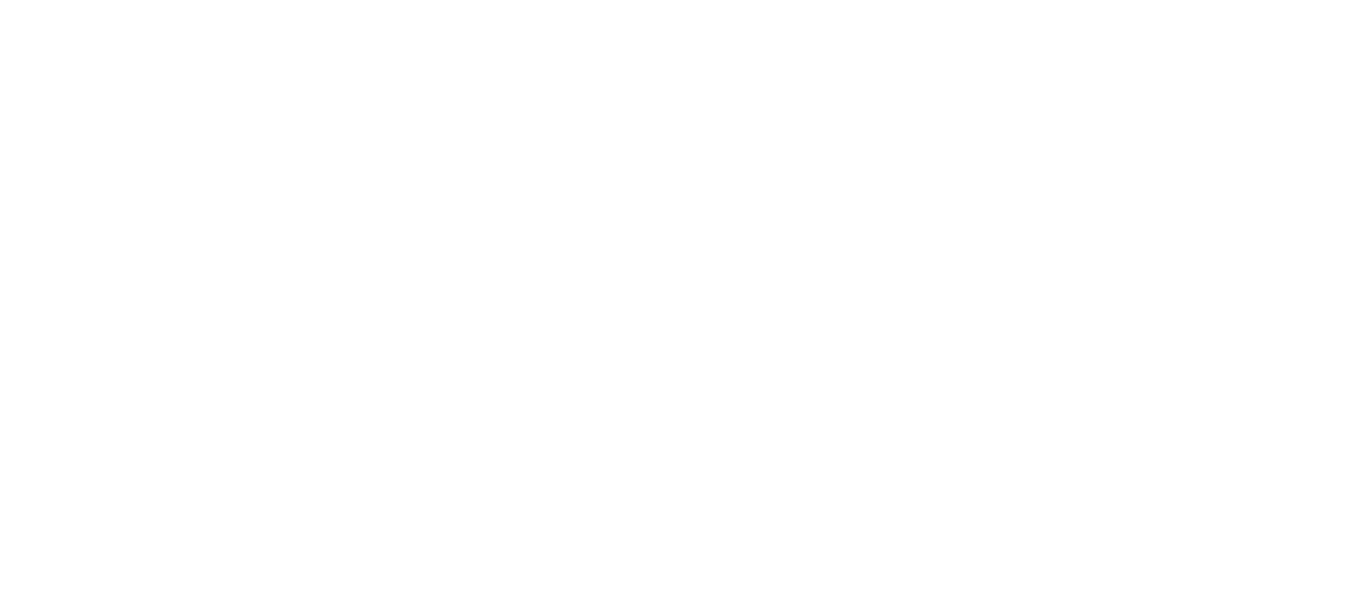

ValueError: cannot convert float NaN to integer

In [31]:
# compute F using the normalized 8-point algorithm 
Fn=computeFnormalized(ptsL,ptsR)

# create the figure element
fig=plt.figure(figsize=(9,4))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

# test the implemented function for drawing epipolar lines
linesL = Fn.dot(ptsR)
linesR = Fn.transpose().dot(ptsL)
imgL_out,imgR_out = drawptsNlines(imgL,imgR,ptsL,ptsR,linesR)
imgR_out,imgL_out = drawptsNlines(imgR,imgL,ptsR,ptsL,linesL)
plt.subplot(121),plt.imshow(imgL_out)
plt.subplot(122),plt.imshow(imgR_out)

# show the plot
plt.show()

Do the epiploar lines look like what is expected?



The computed F may not be highly accurate, and this is dependant on the amount of noise in the data. 

To deal with the noise in the data, we will use RANSAC below.

To use RANSAC, we first need to define a function that computes the error when given an estimated F. This is used to find inliers and evaluate how good the estimated F is in each iteration of the RANSAC algorithm.


Complete the implementation of the following function for computing the error of a given estimated F by filling in the parts labelled TODO. 

In [33]:
# helper function for normalizing a line in homogeneous coordinates
def normalizeLine(line):
    return line/sqrt(line[0]**2+line[1]**2)

# computes the error for an estimated F 
# given the list of corresponding points in ptsL and ptsR
def computeError(ptsL, ptsR, F): 
    ## TODO
    # implement the following code for calculating the error of an estimated F
    # given a list of corresponding points in ptsL and ptsR
    err = 0
    for i in range(ptsL.shape[1]):
        ptR = ptsR[:,i]
        ptL = ptsL[:,i]
        
        
    ## End TODO ##
    
    return err/ptsL.shape[1]


Below is an implementation of using RANSAC to compute F using the normalized 8-point algorithm.

In [34]:
# Computes F using the normalized 8-point algorithm with RANSAC given a list of corresponding points ptsL, ptsR
#
# numMinPts # Number of data points required to estimate F
# thershold # Error threshold for determining if data points fit model well
# numMinInliers # Number of inlier data points required to assert that the computed model is good.
# maxIter # Maximum number of iterations
def computeF_RANSAC(ptsL,ptsR,numMinPts,threshold,numMinInliers,maxIter):

    iteration = 0
    bestF = []
    inlierPtsL = []
    inlierPtsR = []
    minErr = 10000000000 # A very large number
    
    numPts = ptsL.shape[1]
    
    while iteration < maxIter:
        # draw a random set of numMinPts samples
        sampleIndices=(np.random.rand(numMinPts)*(numPts-1)).astype(int) # create an array of n random numbers as indices
        #sampleIndices=[13,22,32,43,67,70,87,92,96,102,118,122,136,142]
        samplePtsL = ptsL[:,sampleIndices] # draw ptsL samples
        samplePtsR = ptsR[:,sampleIndices] # draw ptsR samples
        
        # compute candidate F from samples
        candidateF = computeFnormalized(samplePtsL,samplePtsR) 
        
        # select inliers
        inlierIndices = []
        for i in range(numPts):
            if computeError(ptsL[:,[i]], ptsR[:,[i]], candidateF) < threshold:
                inlierIndices.append(i)
        if len(inlierIndices) > numMinInliers: # cadidnateF is a good model
            
            refinedF = computeFnormalized(ptsL[:,inlierIndices],ptsR[:,inlierIndices]) 
            #refinedF = candidateF
            currErr = computeError(ptsL[:,inlierIndices],ptsR[:,inlierIndices], refinedF)
            if currErr < minErr:
                bestF = refinedF
                minErr = currErr
                inlierPtsL = ptsL[:,inlierIndices]
                inlierPtsR = ptsR[:,inlierIndices]

        iteration = iteration+1

    return bestF, inlierPtsL, inlierPtsR

Now we test our RANSAC function for computing F.

Try to vary the inputs to the RANSAC algorithm (threshold, numMininliers, maxIter).
Good performance of the algorithm depends on good selection of these parameters. 

F computed with RANSAC
[[nan nan nan]
 [nan nan nan]
 [nan nan nan]]
number of inlierPts
85


/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: divide by zero encountered in true_divide
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:35: RuntimeWarning: invalid value encountered in true_divide
/opt/tljh/user/lib/python3.6/site-packages/ipykernel_launcher.py:16: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  app.launch_new_instance()


<IPython.core.display.Javascript object>


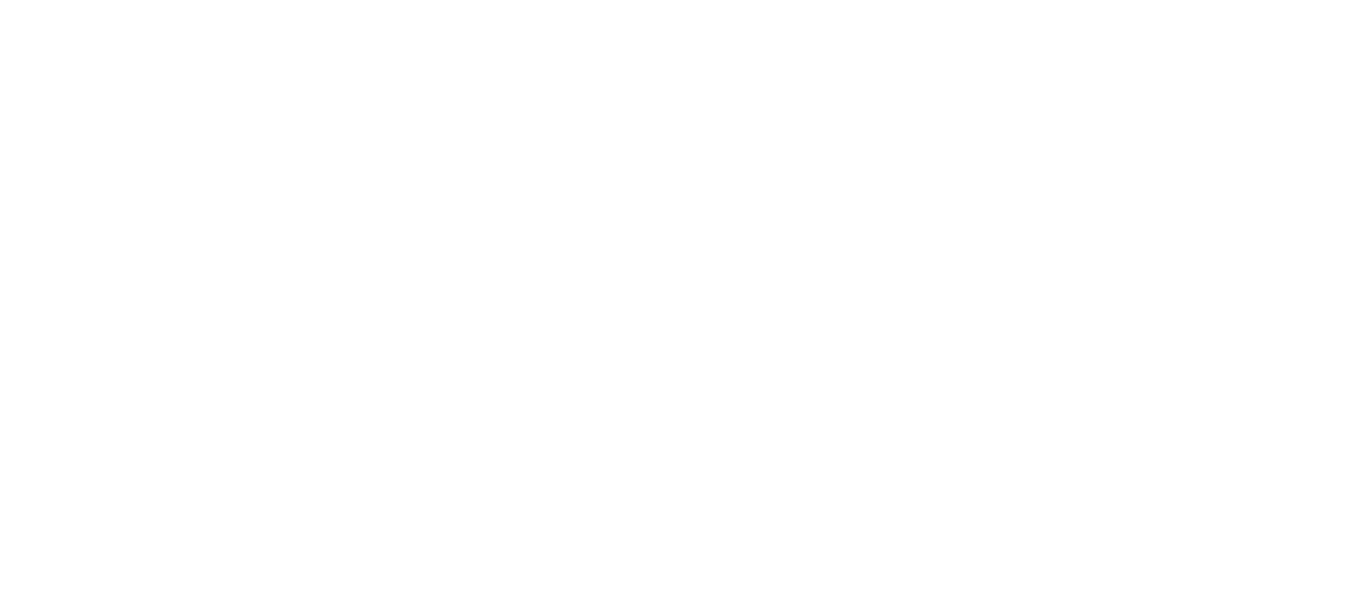

ValueError: cannot convert float NaN to integer

In [36]:
# test the implemented function

## TODO
# vary these input parameter to see how they affect the performance of RANSAC
numMinPts = 1         # Number of samples to draw for computing initial estimate of F
threshold = 1         # Error threshold for determining if data points fit model well
numMinInliers = 1     # Number of inlier data points required to assert that the computed model is good.
maxIter = 1           # Maximum number of iterations


## End TODO ##

# call the function for computer F with RANSAC
Fr, inlierPtsL, inlierPtsR=computeF_RANSAC(ptsL,ptsR,numMinPts,threshold,numMinInliers,maxIter)

if Fr == []:
    print('no solution for F found')
else: 
    print('F computed with RANSAC')
    print(Fr)
    print('number of inlierPts')
    print(inlierPtsL.shape[1])

    # create the figure element
    fig=plt.figure(figsize=(9,4))
    matplotlib.rc('xtick', labelsize=10) 
    matplotlib.rc('ytick', labelsize=10)

    # plot the inlier points and epipolar lines from the computed F
    linesL = Fr.dot(inlierPtsR)
    linesR = Fr.transpose().dot(inlierPtsL)
    imgL_out,imgR_out = drawptsNlines(imgL,imgR,inlierPtsL,inlierPtsR,linesR)
    plt.subplot(121),plt.imshow(imgL_out)
    plt.subplot(122),plt.imshow(imgR_out)

    # show the plot
    plt.show()

The following code also draws the epiploar lines for the left image for visual inspection

<IPython.core.display.Javascript object>


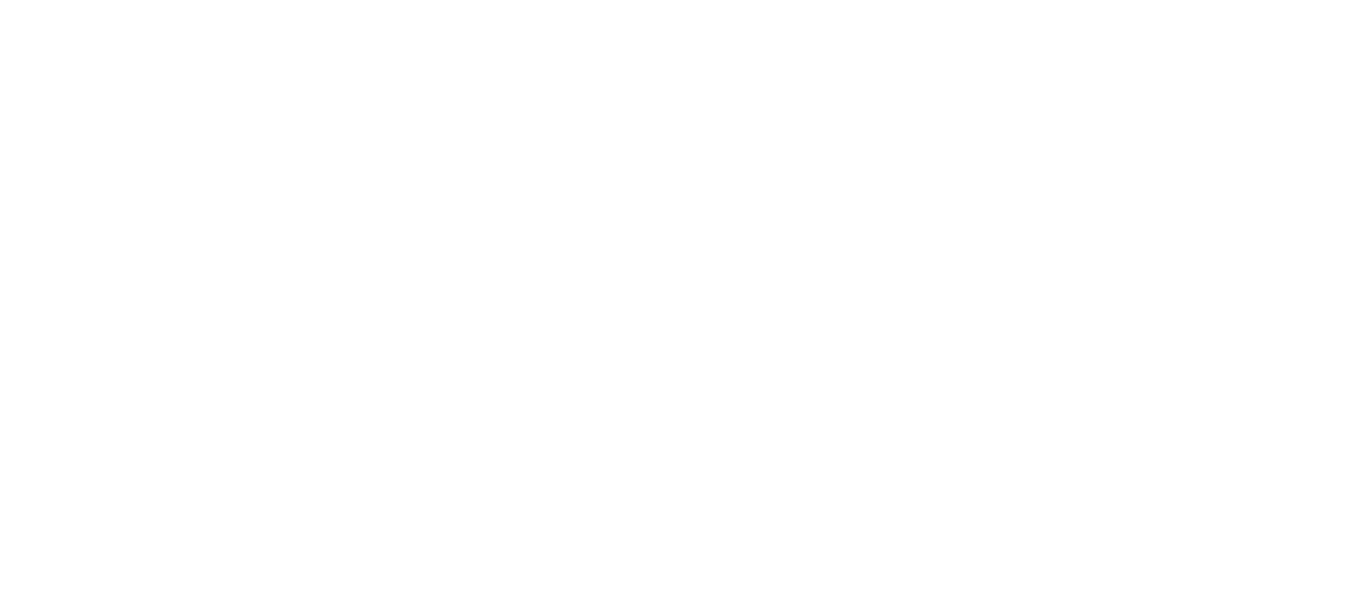

ValueError: cannot convert float NaN to integer

In [37]:
# create the figure element
fig=plt.figure(figsize=(9,4))
matplotlib.rc('xtick', labelsize=10) 
matplotlib.rc('ytick', labelsize=10)

# test the implemented function
imgR_out,imgL_out = drawptsNlines(imgR,imgL,inlierPtsR,inlierPtsL,linesL)
plt.subplot(121),plt.imshow(imgL_out)
plt.subplot(122),plt.imshow(imgR_out)

# show the plot
plt.show()

If you have select a good set of parameters for the RANSAC algorithm, the computed F should be a lot more accurate now.

### ============================= End of Fundamental Matrix =============================